# 🧬 Introduction to Bioinformatics with Biotite
This notebook demonstrates how to work with biological sequences in Python using the **Biotite** library.

We will:
1. Read DNA sequences from a FASTA file.
2. Extract headers and sequences.
3. Compute sequence properties (length, base counts).
4. Calculate GC content and visualize it.
5. Read FASTQ files and extract sequence + quality.
6. Plot quality scores across a sequence.

---

In [1]:
import biotite.sequence.io.fasta as fasta
import biotite.sequence.io.fastq as fastq
from biotite.sequence import NucleotideSequence, AlphabetError
import matplotlib.pyplot as plt
import numpy as np

## Step 1: Read a FASTA file

FASTA format:
- A header line starting with ">"
- The sequence itself (DNA, RNA, or protein)

Let's load a small example FASTA file.

In [2]:
# Example FASTA file content
print("File content:")
with open("data/01_example.fasta", "r") as f:
    for line in f.readlines():
        print(line.strip())

File content:
>Sequence_1
ATGCGTACGTAGCTAGCTAGCTAGCTAGCTAGCGTAGCTAGCTAGCTAGCGATCGATCGATCG
>Sequence_2
GGGGCCCCAAAATTTTGGGCCCAAATTTGGGCCCAGATATATATATGGGCCCTTTGGGCCC
>Sequence_3
ATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATA


Reading the fasta file like a pro

In [3]:
fasta_file = fasta.FastaFile.read("data/01_example.fasta")
print("Headers in file:", list(fasta_file.keys()))

header = list(fasta_file.keys())[0]
seq = fasta.get_sequence(fasta_file, header)
print("Header:", header)
print("First 50 bases:", seq[:50])

Headers in file: ['Sequence_1', 'Sequence_2', 'Sequence_3']
Header: Sequence_1
First 50 bases: ATGCGTACGTAGCTAGCTAGCTAGCTAGCTAGCGTAGCTAGCTAGCTAGC


## Step 2: Explore sequence properties

We can treat the sequence like a Python object.

In [27]:
print("Length:", len(seq))
print("seq (Biotite object)")
print(seq)            # Biotite object
print(type(seq))
print('-'*48)
print("seq.symbols (Numpy object)")
print(seq.symbols)    # Numpy object
print(type(seq.symbols))

Length: 63
seq (Biotite object)
ATGCGTACGTAGCTAGCTAGCTAGCTAGCTAGCGTAGCTAGCTAGCTAGCGATCGATCGATCG
<class 'biotite.sequence.NucleotideSequence'>
------------------------------------------------
seq.symbols (Numpy object)
['A' 'T' 'G' 'C' 'G' 'T' 'A' 'C' 'G' 'T' 'A' 'G' 'C' 'T' 'A' 'G' 'C' 'T'
 'A' 'G' 'C' 'T' 'A' 'G' 'C' 'T' 'A' 'G' 'C' 'T' 'A' 'G' 'C' 'G' 'T' 'A'
 'G' 'C' 'T' 'A' 'G' 'C' 'T' 'A' 'G' 'C' 'T' 'A' 'G' 'C' 'G' 'A' 'T' 'C'
 'G' 'A' 'T' 'C' 'G' 'A' 'T' 'C' 'G']
<class 'numpy.ndarray'>


We can easily count the number of each nuclotides

In [28]:
counts = {nt: int(np.sum(seq.symbols == nt)) for nt in "ACGT"}
print("Base counts:", counts)

Base counts: {'A': 15, 'C': 15, 'G': 18, 'T': 15}


## Step 3: Compute GC content

GC content = fraction of nucleotides that are **Guanine (G)** or **Cytosine (C)**.

In [19]:
gc_count = int(np.sum(seq.symbols == "G")) + int(np.sum(seq.symbols == "C"))
gc_content = gc_count / len(seq) * 100
print(f"GC content: {gc_content:.2f}%")

GC content: 52.38%


## Step 4: GC content distribution across sequences

If the file contains multiple sequences, we can compute GC% for each.

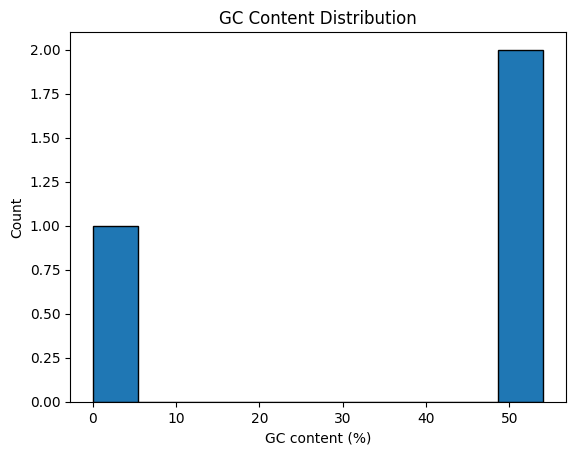

In [29]:
gc_values = []
for header in fasta_file.keys():
    s = fasta.get_sequence(fasta_file, header)
    gc = (int(np.sum(s.symbols == "G")) + int(np.sum(s.symbols == "C"))) / len(s) * 100
    gc_values.append(gc)

plt.hist(gc_values, bins=10, edgecolor="black")
plt.xlabel("GC content (%)")
plt.ylabel("Count")
plt.title("GC Content Distribution")
plt.show()

## Step 5 (Optional): Translate DNA to protein

DNA can be translated into amino acids (protein sequence).

In [56]:
fasta_file = fasta.FastaFile.read("data/01_long_sequence.fasta")
header = list(fasta_file.keys())[0]
seq = fasta.get_sequence(fasta_file, header)
print(f"Nucleotide sequence length: {len(seq)} (=3*{int(len(seq)/3)})")

# translation -> Proteins
protein_seq = seq.translate(complete=True)
print("Protein seuquence length: ", len(protein_seq))
print(f"Protein sequence (first 50 aa): {protein_seq[:50]}...")

Nucleotide sequence length: 168 (=3*56)
Protein seuquence length:  56
Protein sequence (first 50 aa): NDAIDMANDAIDMNDAIDNDAIDNDAIDNDAIDMANDAIDMNDAIDNDAI...


## Step 6: Read a FASTQ file

FASTQ format:
1. Header line starting with `@`
2. Sequence line
3. `+` line
4. Quality string (ASCII encoded)

We can parse FASTQ using Biotite.

In [57]:
# Example FASTQ file content
print("File content:")
with open("data/01_example.fastq", "r") as f:
    for line in f.readlines():
        print(line.strip())

File content:
@SEQ_ID
GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTT
+
!''*((((***+))%%%++)(%%%%).1***-+*''))**55CCF>>>>>>CCCCCCC65


In [59]:
fq = fastq.FastqFile.read("data/01_example.fastq", offset="Sanger")
print("Read IDs:", list(fq.keys()))

sequence, quality_scores = fastq.get_sequence(fq, "SEQ_ID")
print("Sequence:", sequence)
print("Quality scores:", quality_scores)

Read IDs: ['SEQ_ID']
Sequence: GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTT
Quality scores: [ 0  6  6  9  7  7  7  7  9  9  9 10  8  8  4  4  4 10 10  8  7  4  4  4
  4  8 13 16  9  9  9 12 10  9  6  6  8  8  9  9 20 20 34 34 37 29 29 29
 29 29 29 34 34 34 34 34 34 34 21 20]


## Step 7: Plot sequence qualities

We can visualize the per-base quality scores as a bar chart.

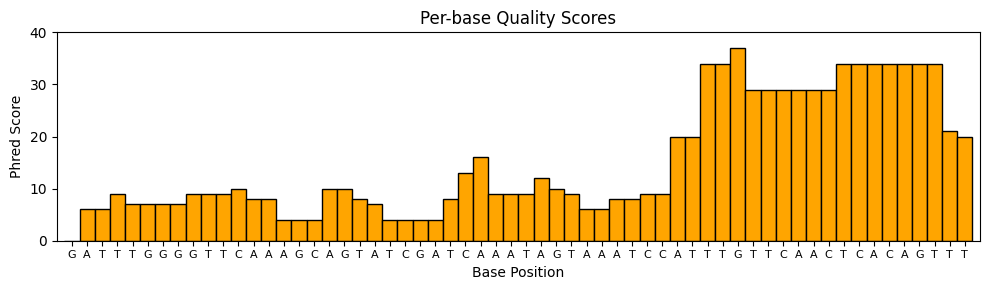

In [60]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(
    x=np.arange(len(sequence)),
    height=quality_scores,
    color='orange',
    width=1.0,
    edgecolor='black'
)
ax.set_xlim(-1, len(sequence))
ax.set_ylim(0, 40)
ax.set_ylabel("Phred Score")
ax.set_xlabel("Base Position")
ax.set_title("Per-base Quality Scores")
ax.set_xticks(np.arange(len(sequence)))
ax.set_xticklabels(list(str(sequence)), fontsize=8)
plt.tight_layout()
plt.show()

# ✅ Summary

- We loaded DNA sequences from a FASTA file.
- Extracted headers and sequences.
- Computed length, base counts, and GC content.
- Visualized GC distribution.
- Translated DNA to protein.
- Loaded FASTQ reads and visualized quality scores.

---